# Veri setinin yüklenmesi ve incelenmesi 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("diabetes.csv")
df = df.copy()
df.dropna(inplace = True)
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### bağımlı değişkenimize bakalım 


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

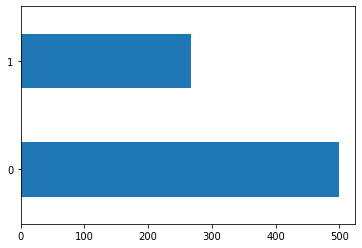

In [5]:
df.Outcome.value_counts().plot.barh();

# Bagımlı ve bağımsız değişken seçimleri 

In [6]:
y = df.Outcome

In [7]:
X = df.drop(["Outcome"] , axis = 1)

# Veri setinin Train - Test Olarak ayrılması 

In [8]:
from sklearn.model_selection import train_test_split , cross_val_score

In [9]:
X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size = 0.30 ,random_state = 11)

In [10]:
print(X_train.shape)
print(y_train.shape)


(537, 8)
(537,)


# Verinin standartlaştırılması 

In [12]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()


In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
X_test_scaled = scaler.fit_transform(X_test)

# Model Kurma 

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
mlpc = MLPClassifier()

In [22]:
mlpc.fit(X_train_scaled ,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
?mlpc

Type:        MLPClassifier
String form:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_ <...> olver='adam', tol=0.0001,
           validation_fraction=0.1, verbose=False, warm_start=False)
File:        c:\programdata\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hype

- alpha = ceza parametresi 
- activation = gizli katmnlar üzerine uygulanacak işlem türü 
- hidden_layer_sizes = gizli katman sayısı 
- solver = öğrenme optimizasyon yöntemi 

# tahmin

In [31]:
from sklearn.metrics import accuracy_score , classification_report

In [29]:
y_pred = mlpc.predict(X_test_scaled)

In [30]:
accuracy_score(y_test , y_pred)

0.7662337662337663

In [33]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       149
           1       0.71      0.59      0.64        82

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.77      0.76       231



# Model tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


In [40]:
mlpc = MLPClassifier()
mlpc_params = {"alpha" : [0.1 ,0.001 ,0.001 ,0.2 ,0.005 ,0.5],
              "hidden_layer_sizes" : [(100 ,10) ,(10 ,20 ) ,(3 ,8) ,(200 , 100) ],
             "solver" : ["lbfgs", "sgd", "adam"],
             "activation" : ["relu" ,"logistic"]}

In [41]:
mlpc_cv = GridSearchCV(mlpc,
                      mlpc_params,
                      cv =10,
                      n_jobs = -1,
                      verbose = 2).fit(X_train_scaled ,y_train )

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conve

In [42]:
mlpc_cv.best_params_

{'activation': 'logistic',
 'alpha': 0.2,
 'hidden_layer_sizes': (200, 100),
 'solver': 'adam'}

In [43]:
y_pred = mlpc_cv.predict(X_test_scaled)

In [44]:
accuracy_score(y_test ,y_pred)

0.7705627705627706